In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
wsc= np.loadtxt('data/Wholesale_customers_data.csv', delimiter=',', skiprows=1)
channel= wsc[:, 0]
region= wsc[:, 1]
data= wsc[:, 2:]

print(channel.shape)
print(channel[0:5])
print(region.shape)
print(region[0:5])
print(data.shape)
print(data[0:5])

(440,)
[2. 2. 2. 1. 2.]
(440,)
[3. 3. 3. 3. 3.]
(440, 6)
[[12669.  9656.  7561.   214.  2674.  1338.]
 [ 7057.  9810.  9568.  1762.  3293.  1776.]
 [ 6353.  8808.  7684.  2405.  3516.  7844.]
 [13265.  1196.  4221.  6404.   507.  1788.]
 [22615.  5410.  7198.  3915.  1777.  5185.]]


Channel（販路）の度数集計

In [4]:
uniq,counts=np.unique(channel,return_counts=True)
print("channel(Horeca:1,Retail:2)")
for i in range(len(uniq)):
    print("  {0:.0f}: {1}".format(uniq[i],counts[i]))
print("  total:",len(channel))

channel(Horeca:1,Retail:2)
  1: 298
  2: 142
  total: 440


Region（地域）の度数集計

In [5]:
uniq,counts=np.unique(region,return_counts=True)
print("region(Lisbon:1,Oporto:2,Other:3):")
for i in range(len(uniq)):
    print("  {0:.0f}: {1}".format(uniq[i],counts[i]))
print("  total:",len(region))

region(Lisbon:1,Oporto:2,Other:3):
  1: 77
  2: 47
  3: 316
  total: 440


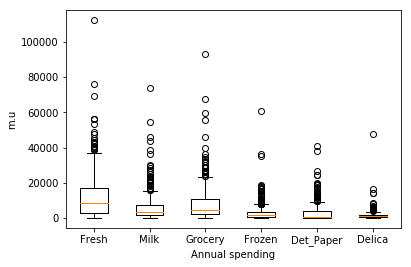

In [6]:
labels=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Det_Paper', 'Delica']
plt.boxplot(data)
plt.xlabel('Annual spending')
plt.ylabel('m.u')
plt.xticks([1,2,3,4,5,6],labels)
plt.show()

In [7]:
n_cls=4
kmout= KMeans(n_cls).fit_predict(data)
print(kmout)

[2 2 2 2 0 2 2 2 2 1 1 2 0 1 0 2 1 2 2 2 2 2 0 1 0 2 2 2 1 0 2 2 2 0 2 1 0
 1 1 0 0 2 1 1 2 1 1 3 2 1 2 2 0 1 0 2 1 1 2 2 2 3 2 1 2 3 2 2 2 2 2 1 2 2
 2 2 2 1 2 2 2 1 1 2 2 3 3 0 2 0 2 2 1 2 1 2 2 2 2 2 1 1 2 0 2 2 1 1 2 1 2
 1 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 1 2 2
 2 0 2 2 2 2 2 1 1 2 2 1 1 2 2 1 2 1 2 2 2 2 1 1 2 1 2 1 0 2 2 2 2 0 1 0 2
 2 2 2 1 1 2 2 2 1 2 2 0 1 2 2 1 1 0 2 2 1 2 2 2 1 2 3 2 2 1 1 1 2 1 2 2 1
 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 0 0 2 2 2 1 2 2 2 2 2 1 2 0 2 0 2 2 0
 0 2 2 2 2 1 1 1 2 1 2 2 2 2 0 2 2 0 2 2 2 2 2 0 0 0 0 2 2 2 0 2 2 2 1 2 2
 2 2 2 2 2 1 2 1 1 1 1 2 2 1 2 0 1 2 2 1 2 2 2 1 2 2 2 2 0 0 2 2 2 2 2 1 2
 3 2 0 2 2 2 2 1 1 2 1 2 2 1 0 2 1 2 1 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 0 2 2 2 2 2 1 0 2 2 0 2 0 2 1 2 2 2 2 2 2 2 2 0 2 2 1 2 2 2 2 0 0 0 2 2 0
 1 2 2 2 2 1 2 2 2 1 2 1 2 1 2 0 2 2 2 1 0 2 2 1 2 2 2 2 0 0 1 2 2]


クラスタのメンバー数

In [8]:
uniq,counts=np.unique(kmout,return_counts=True)
print("Cluster: size")
for i in range(len(uniq)):
    print("  {0:.0f}: {1}".format(uniq[i],counts[i]))
print("  total:",len(kmout))

Cluster: size
  0: 59
  1: 91
  2: 283
  3: 7
  total: 440


[59598.0, 45613.0, 20930.897526501765, 146998.7142857143]


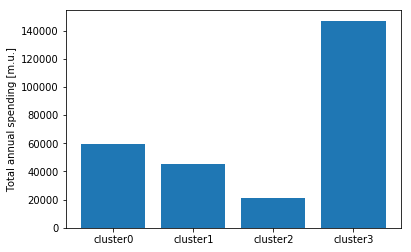

In [9]:
cls_total=[]
cls_x=[]
cls_xticks=[]
for i in range(n_cls):
    data1=data[kmout==i]
    ave=np.mean(np.sum(data1, axis=1))
    cls_total.append(ave)
    cls_x.append(i)
    cls_xticks.append("cluster{0}".format(i))
print(cls_total)    

plt.bar(cls_x, cls_total)
plt.xticks(cls_x, cls_xticks)
plt.ylabel("Total annual spending [m.u.]")
plt.show()

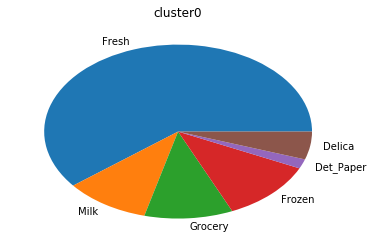

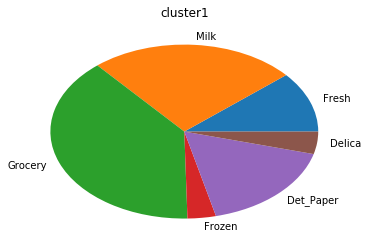

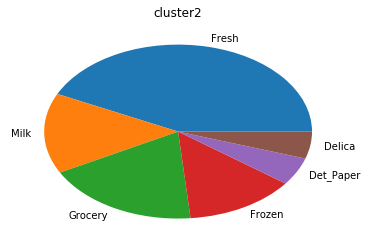

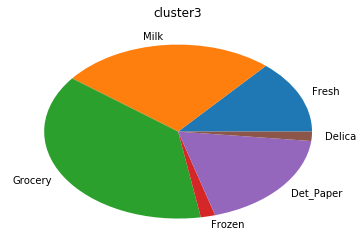

In [10]:
for i in range(n_cls):
    data1=data[kmout==i]
    plt.pie(np.mean(data1, axis=0), labels=labels)
    plt.title("cluster{0}".format(i))
    plt.show()

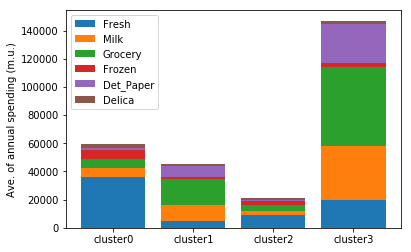

In [11]:
height=np.zeros(n_cls)
for i in range(len(labels)):
    data_pr=data[:, i]
    ave=[]
    for j in range(n_cls):
        ave.append(np.mean(data_pr[kmout==j]))
    plt.bar(cls_x, ave, bottom=height, label=labels[i])
    height+=ave
plt.xticks(cls_x, cls_xticks)
plt.ylabel("Ave. of annual spending (m.u.)")
plt.legend()
plt.show()